# Power Plant Regression Model

## 1. Import Libraries

In [89]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

In [90]:
from tensorflow.keras import layers
from tensorflow.keras import losses 

In [91]:
tf.__version__

'2.9.1'

## 2. Import Dataset

In [92]:
dataset = pd.read_excel("1_power_regression.xlsx")

In [93]:
dataset.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [94]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Build ANN

In [96]:
build_ann = lambda : tf.keras.Sequential([
    layers.Dense(6, activation="relu", input_shape=(X_train[0].shape)),
    layers.Dense(6, activation="relu"),
    layers.Dense(1)

    # 0 / 1 -> sigmoid
    # more classes -> softmax
    # regression -> no activation
])

In [97]:
ann = build_ann()
ann.compile(optimizer="adam", loss=tf.keras.losses.MeanSquaredError())

## 4. Train ANN

In [98]:
history = ann.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
192/192 [==============================] - 1s 2ms/step - loss: 879.5707 - val_loss: 443.6722
Epoch 2/20
192/192 [==============================] - 0s 2ms/step - loss: 357.2388 - val_loss: 282.6380
Epoch 3/20
192/192 [==============================] - 0s 2ms/step - loss: 206.0093 - val_loss: 145.9006
Epoch 4/20
192/192 [==============================] - 0s 2ms/step - loss: 95.2685 - val_loss: 60.4253
Epoch 5/20
192/192 [==============================] - 0s 2ms/step - loss: 46.0854 - val_loss: 41.8353
Epoch 6/20
192/192 [==============================] - 0s 2ms/step - loss: 35.8773 - val_loss: 35.1138
Epoch 7/20
192/192 [==============================] - 0s 2ms/step - loss: 34.1644 - val_loss: 33.7270
Epoch 8/20
192/192 [==============================] - 0s 2ms/step - loss: 33.8872 - val_loss: 33.0615
Epoch 9/20
192/192 [==============================] - 0s 2ms/step - loss: 33.1531 - val_loss: 35.3938
Epoch 10/20
192/192 [==============================] - 0s 2ms/step - loss: 3

## 5. Evaluate Model

In [99]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

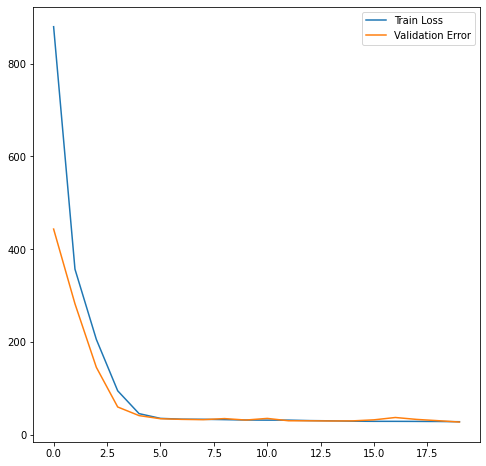

In [100]:
plt.figure(figsize=(8, 8))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Error")
plt.legend()
plt.show()

In [106]:
from sklearn.metrics import r2_score

y_pred = ann.predict(X_test)
r2_score(y_test, y_pred)

60/60 [==============================] - 0s 1ms/step


0.9092994935129374

In [107]:
np.concatenate((y_pred.reshape(-1, 1), y_test.reshape(-1, 1)), axis=1)

array([[458.28619385, 455.27      ],
       [437.80096436, 436.31      ],
       [434.7875061 , 440.68      ],
       ...,
       [479.79507446, 479.53      ],
       [436.58901978, 435.76      ],
       [455.81948853, 457.1       ]])